### Practice Theory topics

#### Feature Scaling

In [2]:
import pandas as pd
from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**1. StandardScaler(Z-score Normalization)**

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled, columns=df.columns)
scaled_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


**2. MinMaxScaler**

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled, columns=df.columns)
scaled_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


 **3. Normalization**

In [5]:
from sklearn.preprocessing import Normalizer

scaler =  Normalizer()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(data=scaled_data, columns=df.columns)

scaled_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639


**4. Absolute Maximum Scaling**

In [6]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns)
scaled_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.645570,0.795455,0.202899,0.08
1,0.620253,0.681818,0.202899,0.08
2,0.594937,0.727273,0.188406,0.08
3,0.582278,0.704545,0.217391,0.08
4,0.632911,0.818182,0.202899,0.08


**5. Robust Scaling**

In [7]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns)

scaled_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.538462,1.0,-0.842857,-0.733333
1,-0.692308,0.0,-0.842857,-0.733333
2,-0.846154,0.4,-0.871429,-0.733333
3,-0.923077,0.2,-0.814286,-0.733333
4,-0.615385,1.2,-0.842857,-0.733333


### Dealing with Imbalanced Datasets


In [8]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1100, 
    n_features=2, 
    n_informative=2, 
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.9, 0.1],  # This creates the imbalance: 90% class 0, 10% class 1
    random_state=42
)

In [9]:
import matplotlib.pyplot as plt
from collections import Counter

def visualize_dataset(X, y, title):
    plt.figure(figsize=(10, 6))
    
    # Plot each class with a different color
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0', alpha=0.7, color='blue', edgecolor='k')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', alpha=0.7, color='red', edgecolor='k')
    
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    
    # Add class counts to the legend
    class_counts = Counter(y)
    legend_labels = [f'Class 0: {class_counts[0]} samples', f'Class 1: {class_counts[1]} samples']
    plt.legend(legend_labels)
    
    plt.tight_layout()
    plt.show()

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(X)
df['target'] = y 

df['target'].value_counts()

target
0    984
1    116
Name: count, dtype: int64

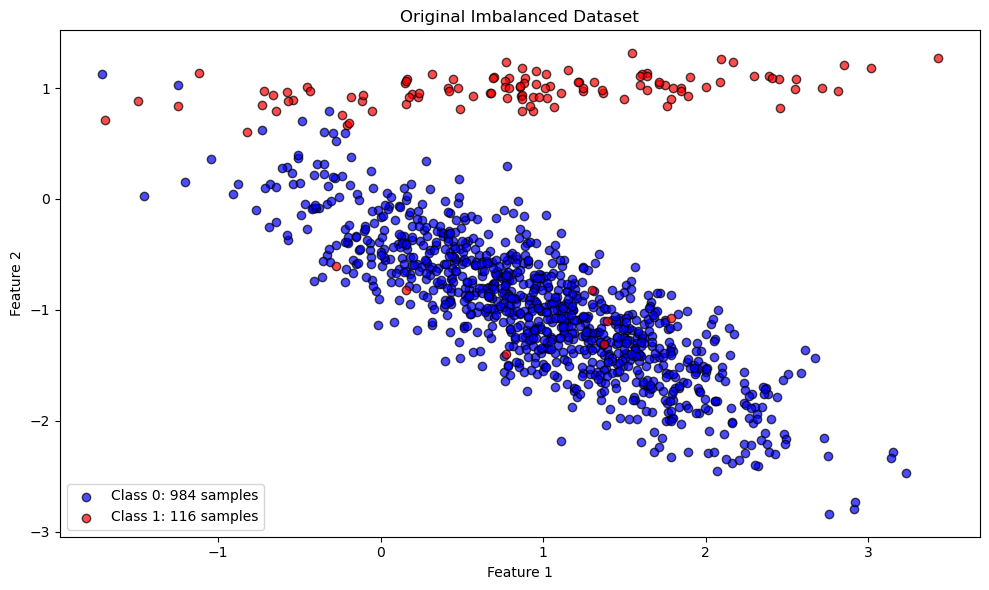

In [11]:
visualize_dataset(X, y, 'Original Imbalanced Dataset')

**1. Over Sampling Method**

In [12]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_resampled_ros, y_resampled_ros = ros.fit_resample(X, y)

In [13]:
df_OS = pd.DataFrame(X_resampled_ros)
df_OS['target'] = y_resampled_ros

df_OS['target'].value_counts()

target
0    984
1    984
Name: count, dtype: int64

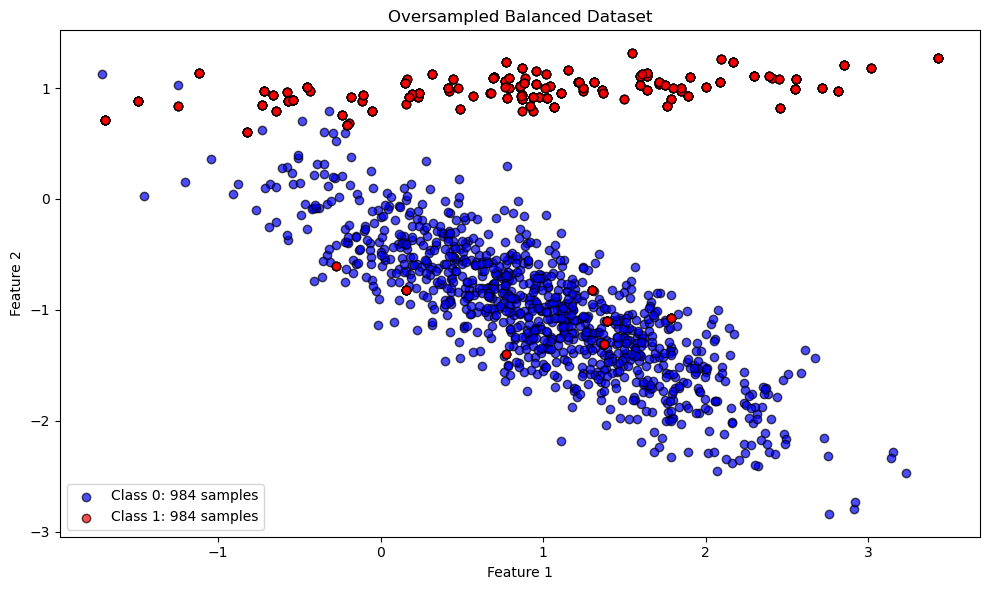

In [14]:
visualize_dataset(X_resampled_ros, y_resampled_ros, 'Oversampled Balanced Dataset')

**2. Under Sampling Method**

In [15]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_resampled_rus, y_resampled_rus = rus.fit_resample(X, y)

In [16]:
df_US = pd.DataFrame(X_resampled_rus)

df_US['target'] = y_resampled_rus

df_US['target'].value_counts()

target
0    116
1    116
Name: count, dtype: int64

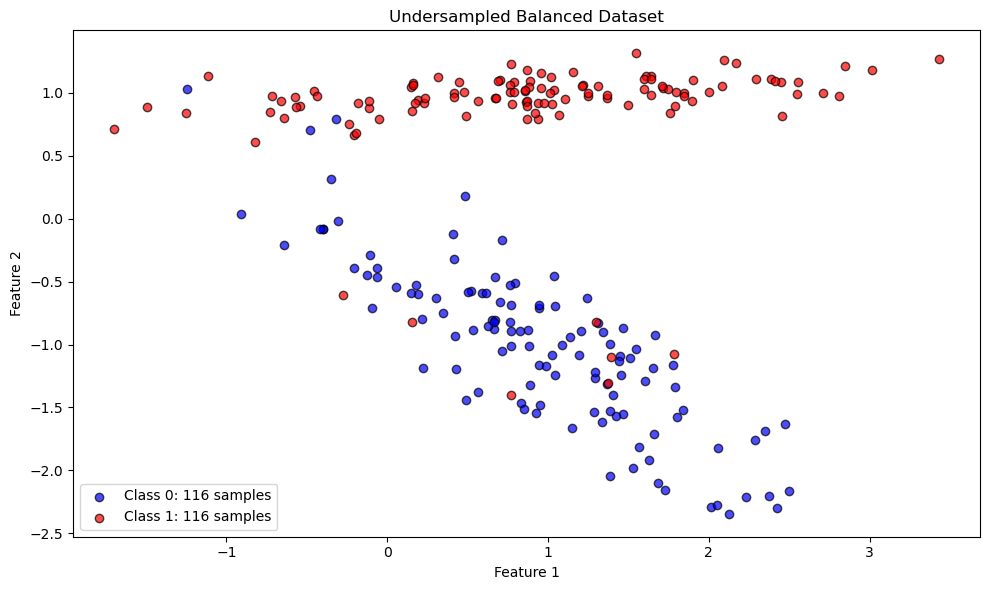

In [17]:
visualize_dataset(X_resampled_rus, y_resampled_rus, 'Undersampled Balanced Dataset')

**3. SMOTE(Synthetic Minority Oversampling Technique)**

In [18]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled_sm, y_resampled_sm = smote.fit_resample(X,y)

In [20]:
df_SM = pd.DataFrame(X_resampled_sm)
df_SM['target'] = y_resampled_sm

df_SM['target'].value_counts()

target
0    984
1    984
Name: count, dtype: int64

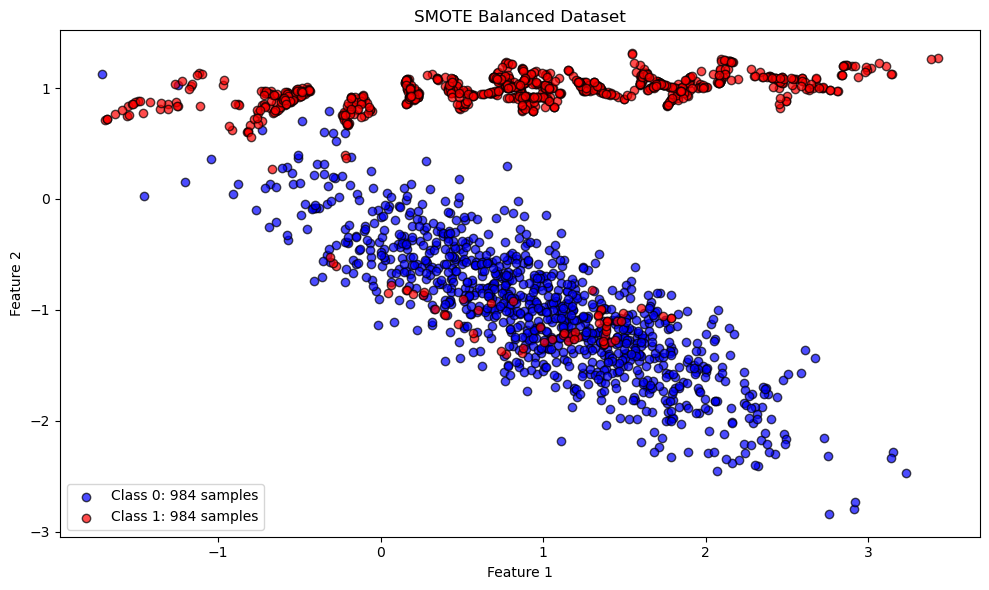

In [21]:
visualize_dataset(X_resampled_sm, y_resampled_sm, 'SMOTE Balanced Dataset')

### Cross Validation Techniques

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_diabetes
from sklearn.model_selection import (
    train_test_split, 
    KFold, 
    StratifiedKFold,
    LeaveOneOut,
    LeavePOut,
    ShuffleSplit,
    TimeSeriesSplit,
    cross_val_score,
    GridSearchCV
)
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

In [23]:
iris = load_iris()
X, y = iris.data, iris.target

In [24]:
def visulize_folds(fold,title='', y=None ):
    fig, axes = plt.subplots(5, 1, figsize=(10, 8))
    fold_indices = []

    for i, (train_idx, test_idx) in enumerate(fold.split(X, y)):
        fold_indices.append(test_idx)
        axes[i].scatter(range(len(X)), [1]*len(X), c=['lightgray']*len(X), marker='|')
        axes[i].scatter(test_idx, [1]*len(test_idx), c=['red'], marker='|')
        axes[i].set_ylabel(f'Fold {i+1}')
        axes[i].set_yticks([])
    
        if i == 4:
            axes[i].set_xlabel('Data Points')
            break
        else:
            axes[i].set_xticks([])


    plt.suptitle(title)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

#### 1. K-Fold Validation

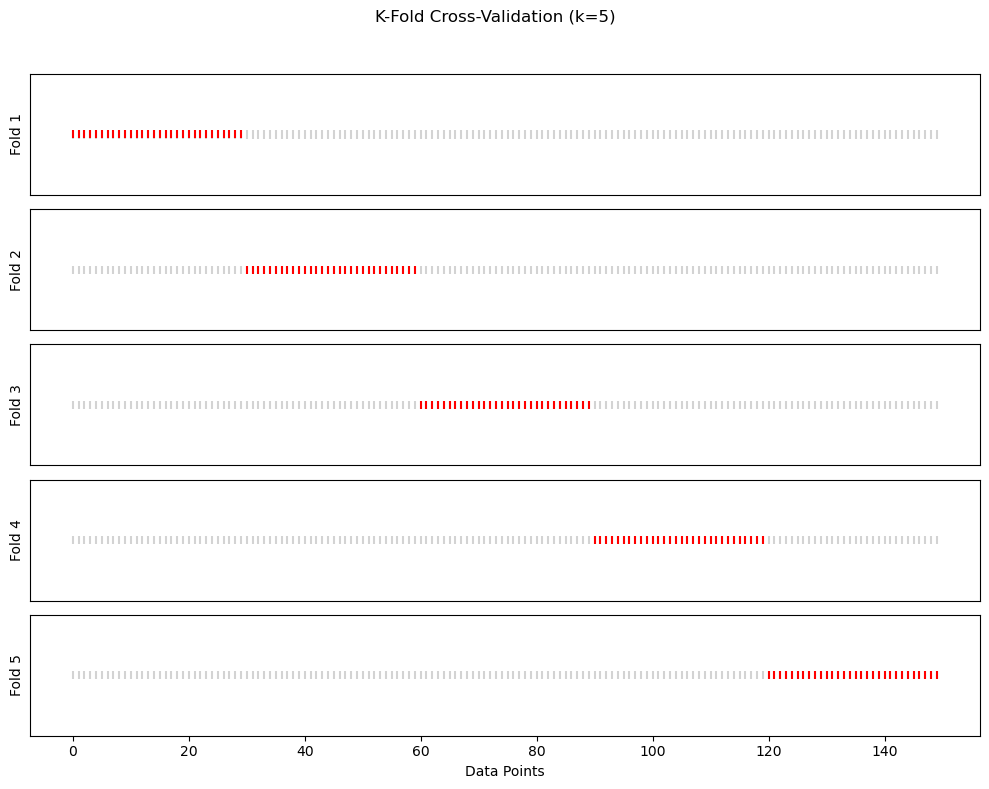

In [25]:
kf = KFold(n_splits=5)

visulize_folds(kf, title='K-Fold Cross-Validation (k=5)')

#### 2. Statrified K-Fold Validation

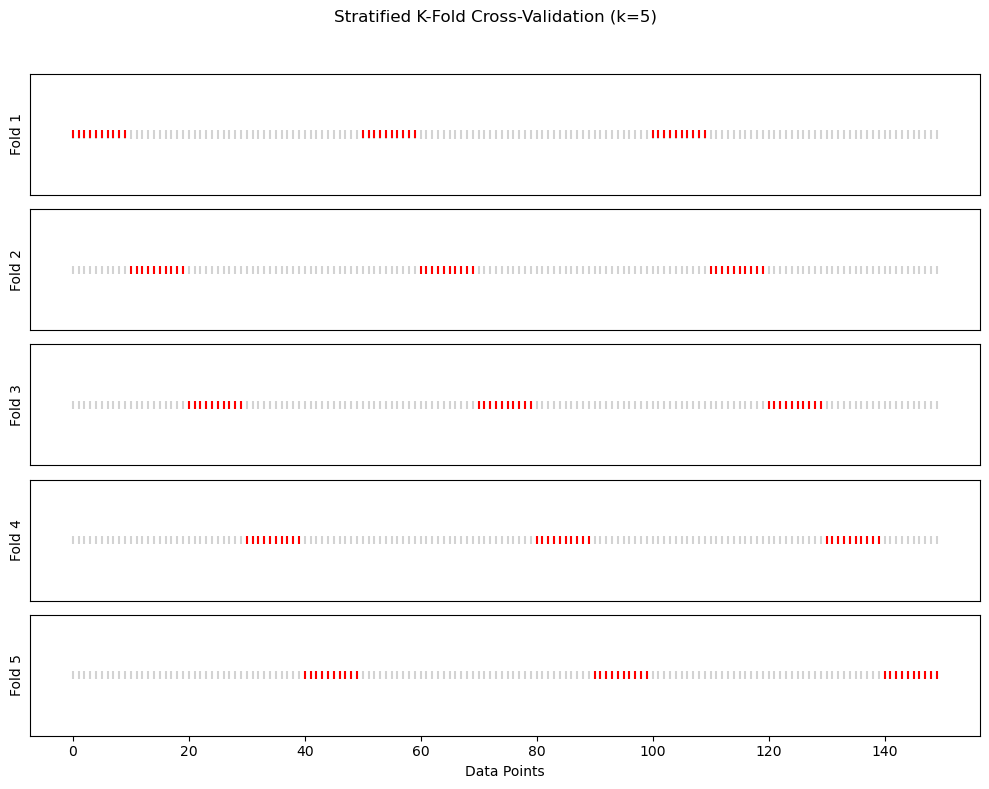

In [26]:
skf = StratifiedKFold(n_splits=5)

visulize_folds(skf,title='Stratified K-Fold Cross-Validation (k=5)', y=y)

#### 3. Leave-One-Out Cross-Validation (LOOCV)

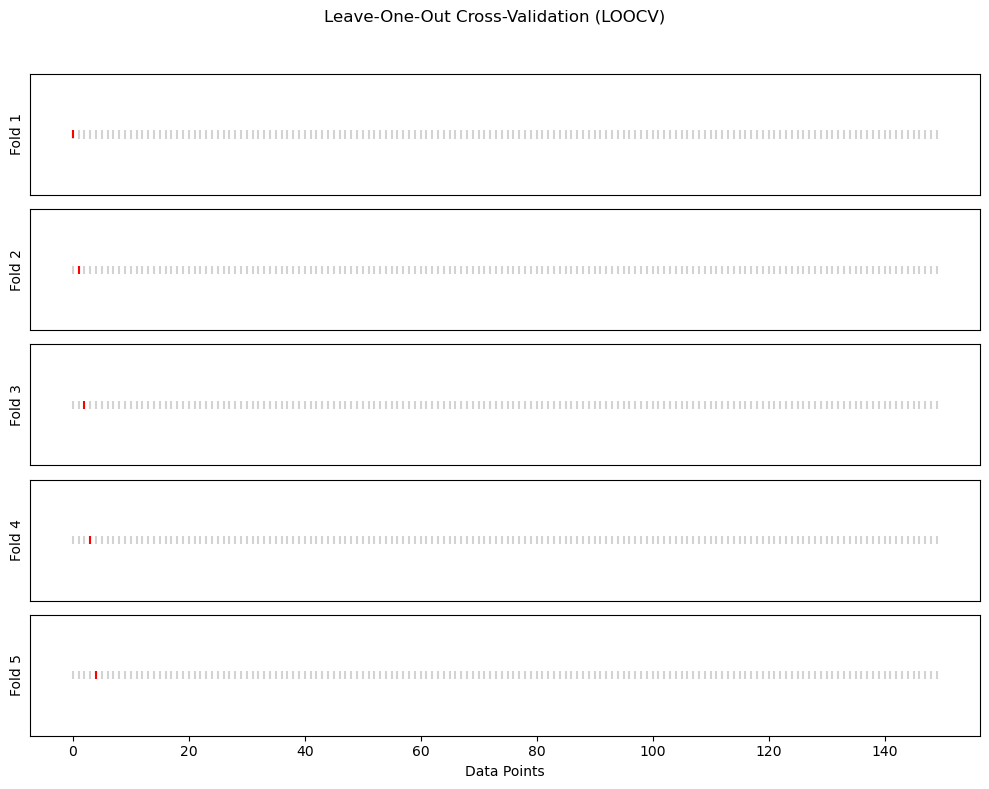

In [27]:
loocv = LeaveOneOut()

visulize_folds(loocv,title='Leave-One-Out Cross-Validation (LOOCV)')

for LOOCV the steps continue for n(no of datapoints) times...

#### 4. Leave-P-Out Cross-Validation

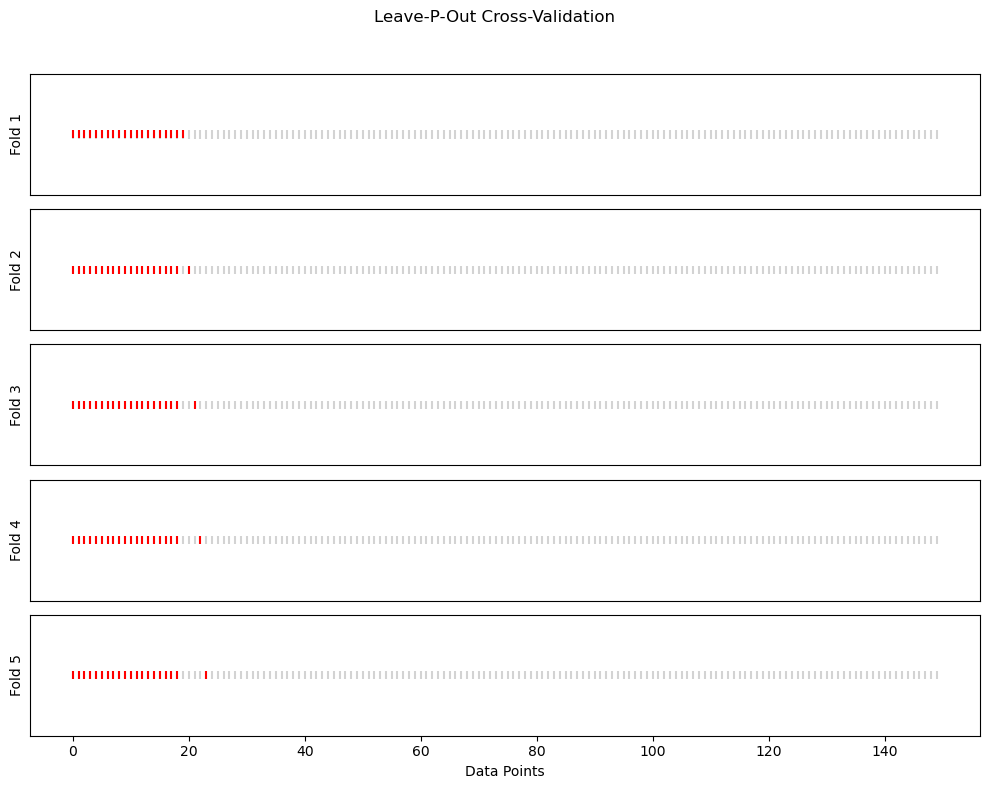

In [28]:
lpocv = LeavePOut(p=20)

visulize_folds(lpocv,title='Leave-P-Out Cross-Validation')

Leave-P-Out Cross-Validation also continue until the all the combination of p points...

#### 5. Time Series Cross-Validation

Fold 1: MSE = 521.58
Fold 2: MSE = 589.21
Fold 3: MSE = 1073.03
Fold 4: MSE = 1999.98
Fold 5: MSE = 2749.96


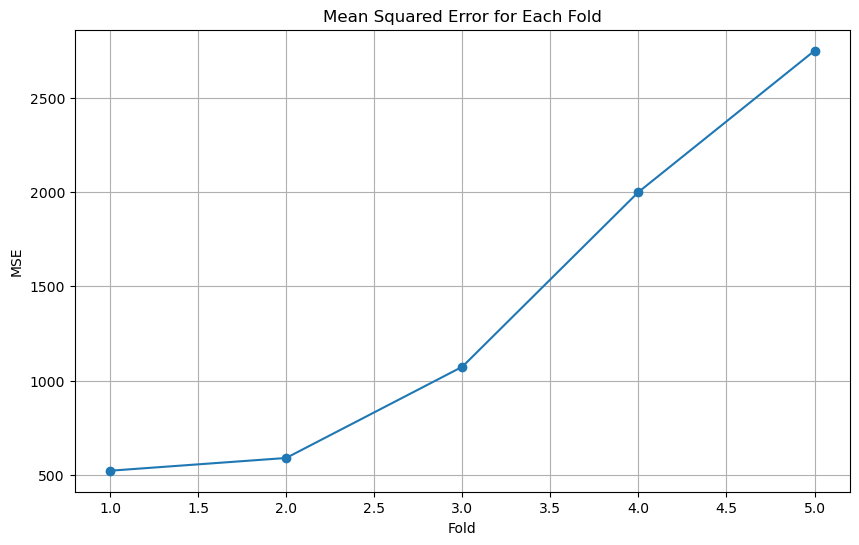

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# Create lag features
df['Passengers_lag1'] = df['Passengers'].shift(1)
df.dropna(inplace=True)

# Define features and target
X = df[['Passengers_lag1']].values
y = df['Passengers'].values

# Define the number of splits
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Store Mean Squared Error for each fold
mse_scores = []

# Iterate through each split
for fold, (train_index, test_index) in enumerate(tscv.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    print(f"Fold {fold}: MSE = {mse:.2f}")

# Plot MSE for each fold
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_splits + 1), mse_scores, marker='o', linestyle='-')
plt.title('Mean Squared Error for Each Fold')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

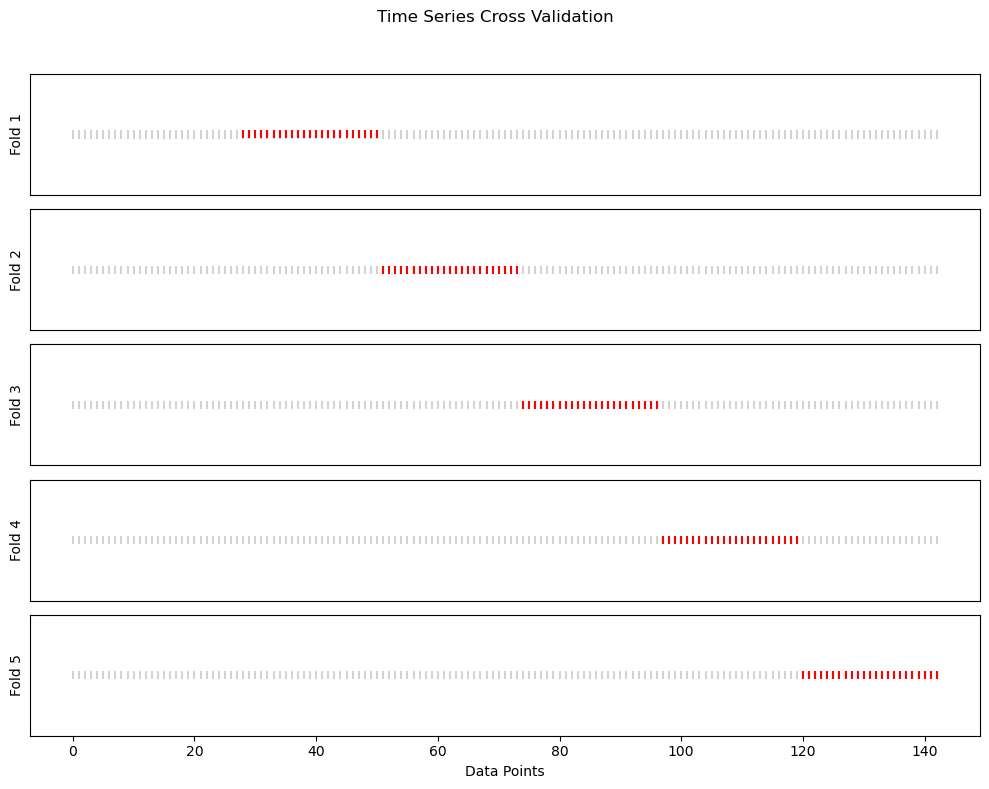

In [30]:
visulize_folds(tscv,title='Time Series Cross Validation')

### Hyperparameter Tuning

#### GridSearchCV

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits,load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV 
from sklearn.metrics import roc_auc_score

In [32]:
# Load Dataset
digits = load_digits()
X, y = digits.data, digits.target

# training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [40]:
# Define the classifier
clf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Define the feature selector
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(10), scoring='roc_auc_ovr')

# Create a pipeline
pipeline = Pipeline([
    ('feature_selection', rfecv),
    ('classification', clf)
])


In [41]:
# Define the parameter grid
param_grid = {
    'classification__n_estimators': [200, 500],
    'classification__max_features': ['sqrt', 'log2'],
    'classification__max_depth': [4, 5, 6, 7,8],
    'classification__criterion': ['gini', 'enthropy']
}

In [43]:
# Define the gridsearchcv
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=StratifiedKFold(10), scoring='roc_auc_ovr', n_jobs=-1)

# fit the model
grid.fit(X_train, y_train)

print('Best Parameters: ', grid.best_params_)
print('Best cross-validation score: ', grid.best_score_)

KeyboardInterrupt: 

#### 2. RandomizedSearchCV

In [2]:
X, y = load_breast_cancer(return_X_y = True)
X.shape

(569, 30)

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y)

ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [27]:
clf = RandomForestClassifier()
clf.fit(X_train_ss, y_train)
y_pred = clf.predict(X_test_ss)

In [28]:
cm = confusion_matrix(y_test, y_pred)
acc_rf = accuracy_score(y_test, y_pred)
acc_rf

0.965034965034965

In [29]:
cm

array([[53,  3],
       [ 2, 85]])

In [22]:
from scipy.stats import randint as sp_randint

param_dist = {"n_estimators": sp_randint (1, 11), 
                  "max_depth": [3, None],
                  "max_features": sp_randint(1, 11),
                  "min_samples_split": sp_randint(1, 11),
                  "min_samples_leaf": sp_randint(1, 11),
                 }

In [23]:
clf = RandomForestClassifier(n_estimators=50)

random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=20, cv=5)
random_search.fit(X_train_ss, y_train)

random_search.best_params_

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-pac

{'max_depth': None,
 'max_features': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 9}

In [24]:
best_model = random_search.best_estimator_

y_pred_rs = best_model.predict(X_test)

accuracy_score(y_test, y_pred_rs)

0.3146853146853147

In [25]:
confusion_matrix(y_test, y_pred_rs)

array([[45,  0],
       [98,  0]])

### Metrics for Classification

In [30]:
# Data Preparation
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [31]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42)
clf.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

Confusion Matrix: 
 [[41  2]
 [ 0 71]]
accuracy 0.9824561403508771
Precision:  0.9726027397260274
Recall 1.0
F1 Score 0.9861111111111112
ROC AUC 0.9977071732721913


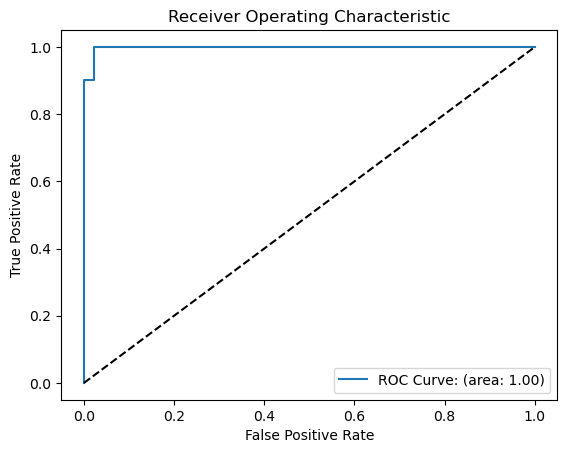

In [37]:
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve)
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test_scaled)
y_proba = clf.predict_proba(X_test_scaled)

# Confusion Matrix
cm  = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)

# Accuracy 
accuracy = accuracy_score(y_test, y_pred)
print("accuracy", accuracy)

# Precision 
precision = precision_score(y_test, y_pred)
print('Precision: ', precision)

# Recall 
recall = recall_score(y_test, y_pred)
print("Recall", recall)

# F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score", f1)

# ROC AUC 
roc_auc = roc_auc_score(y_test, y_proba[:, 1])
print("ROC AUC", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve: (area: {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### Metrics for Regression

In [38]:
from sklearn.datasets import fetch_california_housing

# Load Dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Feature Scaling
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [39]:
# Model Training
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse:.2f}')

# R - squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 0.53
Mean Squared Error: 0.56
Root Mean Squared Error: 0.75
R-squared: 0.58


### Model Interpretation and Feature Importance